In [1]:
import numpy as np

In [21]:
# генерируем дискретную величину
np.random.randint(1, 5)

4

In [22]:
np.random.randint(1, 5, 100)

array([2, 2, 4, 1, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 1, 3, 3, 4, 3, 3, 2,
       1, 1, 1, 4, 1, 3, 1, 2, 4, 1, 2, 1, 2, 3, 2, 3, 2, 2, 3, 2, 4, 1,
       3, 4, 2, 2, 4, 3, 4, 3, 3, 1, 1, 4, 2, 1, 2, 4, 2, 3, 2, 4, 4, 1,
       3, 4, 1, 4, 4, 1, 1, 3, 3, 2, 3, 3, 2, 4, 4, 3, 1, 1, 3, 2, 3, 4,
       4, 2, 2, 2, 3, 2, 2, 4, 1, 4, 4, 2])

In [23]:
# генерируем непрерывную величину
np.random.random(100)

array([0.85137005, 0.2969896 , 0.56165297, 0.99057367, 0.19409163,
       0.4068544 , 0.55756749, 0.17050125, 0.69832507, 0.15214685,
       0.00834305, 0.23842063, 0.12351715, 0.21503987, 0.25367509,
       0.50316148, 0.56883207, 0.72713586, 0.41962141, 0.20089811,
       0.13889922, 0.93557246, 0.38881926, 0.41858156, 0.34531364,
       0.3090644 , 0.29107278, 0.86968804, 0.93879093, 0.05922644,
       0.54070565, 0.8259454 , 0.48914705, 0.42229705, 0.83768093,
       0.94642407, 0.50600384, 0.06456809, 0.64313545, 0.89244921,
       0.19835333, 0.60719732, 0.93559595, 0.56802062, 0.00787228,
       0.65406786, 0.74565436, 0.73507389, 0.45618269, 0.66185368,
       0.2959173 , 0.53744266, 0.32534843, 0.39304662, 0.86368411,
       0.4144    , 0.01549749, 0.80354865, 0.48143157, 0.66918367,
       0.44484065, 0.02779865, 0.69189696, 0.32518591, 0.49924046,
       0.8798111 , 0.15833043, 0.43395013, 0.05538491, 0.05339902,
       0.46957173, 0.07626051, 0.23131232, 0.12190716, 0.58821

In [25]:
np.random.uniform(1, 5)

4.43901581477372

In [26]:
np.random.seed(None)
np.random.uniform(1, 5, 10)

array([4.24244973, 2.82310667, 2.71232669, 3.49400799, 4.48018276,
       2.12707958, 1.70234426, 2.2409917 , 2.31187687, 3.08210384])

**Задача 1.** Оценить вероятность того, что на игральной кости выпадет больше 4 очков. Сравнить с теоретической вероятностью.

In [28]:
import numpy as np
np.random.seed(None)
trials = 10000000    # Количество попыток
successes = 0    # Количество успехов

for i in range(trials):
    random_score = np.random.randint(1, 7)    # Случайное количество очков от 1 до 6
    if random_score > 4:
        successes += 1
        
p_monte_carlo = successes / trials    # Вероятность из моделирования
p = 2 / 6                             # Теоретическая вероятность

print(successes, trials, p_monte_carlo, p)

3333408 10000000 0.3333408 0.3333333333333333


**Задача 1А** (опциональная). Дан квадрат, в который вписан круг (касаясь сторон квадрата). В квадрат случайным образом попадают точки. Какова вероятность, что наугад взятая точка попадёт в круг?  
_Подсказка:_ Удобно взять квардат со стороной, равной 2, и отсчитывать координаты точек от его центра.

In [30]:
trials = 1000000
successes = 0

for i in range(trials):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    
    if x**2 + y**2 < 1:
        successes += 1
        
res = successes / trials
print(res)

0.78482


In [31]:
res * 4

3.13928

**Задача 2.** Смоделировать стрельбу по мишени.

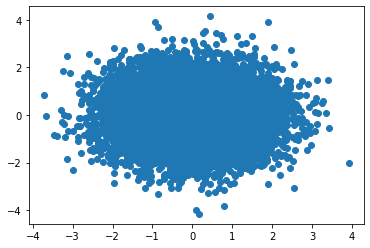

In [36]:
import matplotlib.pyplot as plt

shots = 10000    # Количество выстрелов
std_dev = 1
# Стандартное отклонение (на сколько мы в среднем будем мазать)

x = np.random.normal(0, std_dev, shots) # 0 - и среднее, и мода, и медиана
y = np.random.normal(0, std_dev, shots)


plt.scatter(x, y)
# почему разброс от -3 до 3?

**Задача 3.** Графически определить распределение измеренных значений физической величины, когда измерительный прибор имеет случайную погрешность.

In [37]:
import pandas as pd

data = pd.read_csv("data.log", sep=" ")["az"]
data.describe()

count    1040.000000
mean       -9.797112
std         0.087958
min       -10.030373
25%        -9.866481
50%        -9.800747
75%        -9.727398
max        -9.570811
Name: az, dtype: float64

In [38]:
uni = np.random.uniform(min(data), max(data), 10000)
normal = np.random.normal(np.mean(data), np.std(data, ddof=1), 10000)

<AxesSubplot:>

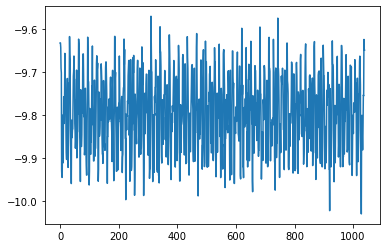

In [39]:
data.plot()

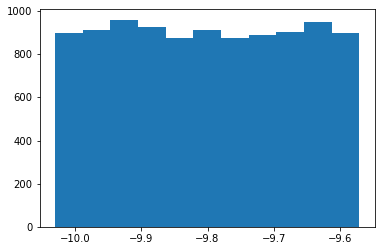

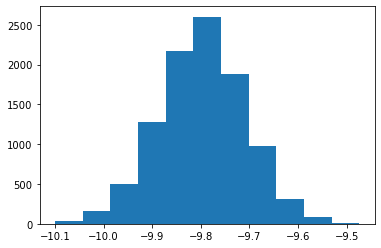

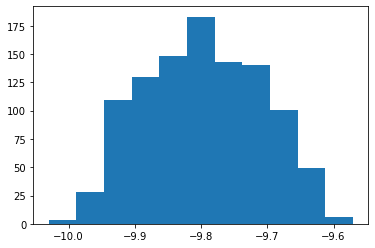

In [14]:
plt.hist(uni, bins=11)
plt.show()
plt.hist(normal, bins=11)
plt.show()
plt.hist(data, bins=11)
plt.show()

**Задача 4.** Рассчитать вероятность того, что пациент заражён COVID-19, если известно, что тест дал положительный результат. Сравнить с результатом моделирования.

In [45]:
prev = 0.10    # Распространённость болезни
sens = 0.97    # Чувствительность теста
spec = 0.90    # Специфичность теста

p = (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))   # Теоретическая вероятность 
print(p)

0.5187165775401069


In [41]:
population = 100000    # Количество испытуемых

true_pos = 0    # Количество больных с положительным тестом
false_pos = 0   # Количество здоровых с положительным тестом

for i in range(population):
    # Наугад решаем, заражён ли человек
    # для этого генерируем случайную величину от 0 до 1     
    infected = np.random.uniform() < prev
    
    # Наугад решаем, дал ли тест положительный результат 
    positive = np.random.uniform() < sens if infected else np.random.uniform() < 1 - spec
    
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1
            
p_monte_carlo = true_pos / (true_pos + false_pos)    # Вероятность из моделирования
print(p_monte_carlo)

0.5173494872203624
